* 캐글 필사 과제 : 장바구니 분석으로 아래 두 개의 데이터 중 하나를 분석합니다.

(난이도 쉬움) [Market Basket Optimization | Kaggle](https://www.kaggle.com/roshansharma/market-basket-optimization/notebooks)

(난이도 어려우며, 파일사이즈가 커서 메모리가 많이 필요합니다.) [Instacart Market Basket Analysis | Kaggle](https://www.kaggle.com/c/instacart-market-basket-analysis/overview)

* 추천 글 : 
    * [Instacart data exploratory 1](https://brunch.co.kr/@goodvc78/17)
    * [Instacart data exploratory 2](https://brunch.co.kr/@goodvc78/18)

In [97]:
# 테스트를 위해 아래 셀을 실행해 주세요.
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.2)

%matplotlib inline

In [98]:
df = sns.load_dataset("diamonds")
print(df.shape)
df.head()

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1. price 가 높은 순으로 정렬 한 후 상위 5개만 출력해 주세요.
* 다음의 결과가 출력되도록 합니다.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>carat</th>
      <th>cut</th>
      <th>color</th>
      <th>clarity</th>
      <th>depth</th>
      <th>table</th>
      <th>price</th>
      <th>x</th>
      <th>y</th>
      <th>z</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>27749</th>
      <td>2.29</td>
      <td>Premium</td>
      <td>I</td>
      <td>VS2</td>
      <td>60.8</td>
      <td>60.0</td>
      <td>18823</td>
      <td>8.50</td>
      <td>8.47</td>
      <td>5.16</td>
    </tr>
    <tr>
      <th>27748</th>
      <td>2.00</td>
      <td>Very Good</td>
      <td>G</td>
      <td>SI1</td>
      <td>63.5</td>
      <td>56.0</td>
      <td>18818</td>
      <td>7.90</td>
      <td>7.97</td>
      <td>5.04</td>
    </tr>
    <tr>
      <th>27747</th>
      <td>1.51</td>
      <td>Ideal</td>
      <td>G</td>
      <td>IF</td>
      <td>61.7</td>
      <td>55.0</td>
      <td>18806</td>
      <td>7.37</td>
      <td>7.41</td>
      <td>4.56</td>
    </tr>
    <tr>
      <th>27746</th>
      <td>2.07</td>
      <td>Ideal</td>
      <td>G</td>
      <td>SI2</td>
      <td>62.5</td>
      <td>55.0</td>
      <td>18804</td>
      <td>8.20</td>
      <td>8.13</td>
      <td>5.11</td>
    </tr>
    <tr>
      <th>27745</th>
      <td>2.00</td>
      <td>Very Good</td>
      <td>H</td>
      <td>SI1</td>
      <td>62.8</td>
      <td>57.0</td>
      <td>18803</td>
      <td>7.95</td>
      <td>8.00</td>
      <td>5.01</td>
    </tr>
  </tbody>
</table>

In [99]:
df.sort_values(by = 'price', ascending = False).head()

,carat,cut,color,clarity,depth,table,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01


## 2. carat 은 높은 순으로 depth 는 낮은순으로 정렬을 해서 다음의 결과가 나오도록 출력합니다.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>carat</th>
      <th>cut</th>
      <th>color</th>
      <th>clarity</th>
      <th>depth</th>
      <th>table</th>
      <th>price</th>
      <th>x</th>
      <th>y</th>
      <th>z</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>27415</th>
      <td>5.01</td>
      <td>Fair</td>
      <td>J</td>
      <td>I1</td>
      <td>65.5</td>
      <td>59.0</td>
      <td>18018</td>
      <td>10.74</td>
      <td>10.54</td>
      <td>6.98</td>
    </tr>
    <tr>
      <th>27630</th>
      <td>4.50</td>
      <td>Fair</td>
      <td>J</td>
      <td>I1</td>
      <td>65.8</td>
      <td>58.0</td>
      <td>18531</td>
      <td>10.23</td>
      <td>10.16</td>
      <td>6.72</td>
    </tr>
    <tr>
      <th>27130</th>
      <td>4.13</td>
      <td>Fair</td>
      <td>H</td>
      <td>I1</td>
      <td>64.8</td>
      <td>61.0</td>
      <td>17329</td>
      <td>10.00</td>
      <td>9.85</td>
      <td>6.43</td>
    </tr>
    <tr>
      <th>25998</th>
      <td>4.01</td>
      <td>Premium</td>
      <td>I</td>
      <td>I1</td>
      <td>61.0</td>
      <td>61.0</td>
      <td>15223</td>
      <td>10.14</td>
      <td>10.10</td>
      <td>6.17</td>
    </tr>
    <tr>
      <th>25999</th>
      <td>4.01</td>
      <td>Premium</td>
      <td>J</td>
      <td>I1</td>
      <td>62.5</td>
      <td>62.0</td>
      <td>15223</td>
      <td>10.02</td>
      <td>9.94</td>
      <td>6.24</td>
    </tr>
  </tbody>
</table>

In [100]:
df.sort_values(by = ['carat', 'depth'], ascending = [False, True])

,carat,cut,color,clarity,depth,table,price,x,y,z
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
...,...,...,...,...,...,...,...,...,...,...
31601,0.20,Premium,D,VS2,61.7,60.0,367,3.77,3.72,2.31
31599,0.20,Ideal,E,VS2,62.2,57.0,367,3.76,3.73,2.33
31600,0.20,Premium,D,VS2,62.3,60.0,367,3.73,3.68,2.31
31596,0.20,Premium,F,VS2,62.6,59.0,367,3.73,3.71,2.33


## 3. 다음의 결과가 나오도록 groupby를 써서 연산을 하고 count 값이 높은 순으로 정렬하고 상위 3개값만 출력합니다.
* 아래의 결과가 출력되도록 합니다.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>count</th>
      <th>sum</th>
    </tr>
    <tr>
      <th>clarity</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>SI1</th>
      <td>13065</td>
      <td>52207755</td>
    </tr>
    <tr>
      <th>VS2</th>
      <td>12258</td>
      <td>48112520</td>
    </tr>
    <tr>
      <th>SI2</th>
      <td>9194</td>
      <td>46549485</td>
    </tr>
  </tbody>
</table>

In [139]:
df.groupby('clarity').agg(['count','sum'])['price'].sort_values(by = 'count', ascending = False).head(3)

,count,sum
clarity,,
SI1,13065,52207755
VS2,12258,48112520
SI2,9194,46549485


## 4. pivot_table을 사용해서 아래의 결과가 출력되도록 합니다. 각 값은 price 의 합계가 되도록 계산합니다.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>color</th>
      <th>D</th>
      <th>E</th>
      <th>F</th>
      <th>G</th>
      <th>H</th>
      <th>I</th>
      <th>J</th>
    </tr>
    <tr>
      <th>cut</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Fair</th>
      <td>699443</td>
      <td>824838</td>
      <td>1194025</td>
      <td>1331126</td>
      <td>1556112</td>
      <td>819953</td>
      <td>592103</td>
    </tr>
    <tr>
      <th>Good</th>
      <td>2254363</td>
      <td>3194260</td>
      <td>3177637</td>
      <td>3591553</td>
      <td>3001931</td>
      <td>2650994</td>
      <td>1404271</td>
    </tr>
    <tr>
      <th>Ideal</th>
      <td>7450854</td>
      <td>10138238</td>
      <td>12912518</td>
      <td>18171930</td>
      <td>12115278</td>
      <td>9317974</td>
      <td>4406695</td>
    </tr>
    <tr>
      <th>Premium</th>
      <td>5820962</td>
      <td>8270443</td>
      <td>10081319</td>
      <td>13160170</td>
      <td>12311428</td>
      <td>8491146</td>
      <td>5086030</td>
    </tr>
    <tr>
      <th>Very Good</th>
      <td>5250817</td>
      <td>7715165</td>
      <td>8177367</td>
      <td>8903461</td>
      <td>8272552</td>
      <td>6328079</td>
      <td>3460182</td>
    </tr>
  </tbody>
</table>

In [101]:
df.pivot_table(index = 'cut', columns = 'color', values = 'price', aggfunc = sum)

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,699443,824838,1194025,1331126,1556112,819953,592103
Good,2254363,3194260,3177637,3591553,3001931,2650994,1404271
Ideal,7450854,10138238,12912518,18171930,12115278,9317974,4406695
Premium,5820962,8270443,10081319,13160170,12311428,8491146,5086030
Very Good,5250817,7715165,8177367,8903461,8272552,6328079,3460182


## 5. cut 컬럼의 값이 Ideal 이고 color 가 G인 데이터를 가져와서 아래의 컬럼만 출력이 되게 해주세요.
* ["carat","clarity", "depth", "table", "price"]
* 이 때, price 가 높은 순으로 위에서 3개만 출력되게 해주세요.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>carat</th>
      <th>clarity</th>
      <th>depth</th>
      <th>table</th>
      <th>price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>27747</th>
      <td>1.51</td>
      <td>IF</td>
      <td>61.7</td>
      <td>55.0</td>
      <td>18806</td>
    </tr>
    <tr>
      <th>27746</th>
      <td>2.07</td>
      <td>SI2</td>
      <td>62.5</td>
      <td>55.0</td>
      <td>18804</td>
    </tr>
    <tr>
      <th>27741</th>
      <td>2.15</td>
      <td>SI2</td>
      <td>62.6</td>
      <td>54.0</td>
      <td>18791</td>
    </tr>
  </tbody>
</table>

In [102]:
cols = ["carat","clarity", "depth", "table", "price"]
cols
df_1 = df[(df['cut'] == 'Ideal') & (df['color'] == 'G')]
df_1 = df_1[cols]
df_1.sort_values(by = 'price', ascending = False).head(3)

,carat,clarity,depth,table,price
27747,1.51,IF,61.7,55.0,18806
27746,2.07,SI2,62.5,55.0,18804
27741,2.15,SI2,62.6,54.0,18791


## 6. 다음의 결과가 출력되도록 새로운 컬럼을 추가하고 새로만든 컬럼의 값을 value_counts() 로 구해보세요.
1. price 컬럼에서 900 보다 작은 값(900포함 안 됨)을 찾아서 category 라는 새로운 컬럼을 만들고 "low"라는 값을 넣습니다.
1. price 컬럼에서 5000 보다 큰 값(5000 포함 안 됨)을 찾아서 category 라는 새로운 컬럼에 "high"라는 값을 넣습니다.
1. 나머지 값은 fillna 를 통해 "medium" 이라는 값으로 채웁니다.
그리고 새로만든 df["category"] 컬럼의 카테고리 값을 집계합니다. 아래의 값이 출력됩니다.
```
medium    26899
high      14714
low       12327
Name: category, dtype: int64
```

In [107]:
df.loc[df['price'] < 900, 'category'] = 'low'
df.loc[df['price'] > 5000, 'category'] = 'high'
df['category'] = df['category'].fillna('medium')
df['category'].value_counts()

medium    26899
high      14714
low       12327
Name: category, dtype: int64

## 7. clarity 컬럼의 value_counts 로 위에서 3개의 값을 가져오고 top이라는 변수에 담아주세요.
* top 이라는 변수에서 아래의 index 값만 추출합니다. 그리고 아래의 결과를 top_index 라는 변수에 담습니다.
```
Index(['SI1', 'VS2', 'SI2'], dtype='object')
```

In [123]:
# clarity 컬럼의 value_counts 로 위에서 3개의 값을 가져오고 top이라는 변수에 담아주세요.
# 그리고 아래 코드를 실행했을 때 Index(['SI1', 'VS2', 'SI2'], dtype='object') 가 출력되게 해주세요.


top = df['clarity'].value_counts().head(3)
top_index = top.index

## 8. 위에서 추출한 top_index 변수에 담긴 값을 "clarity" 컬럼에서 isin 으로 가져오세요.
df_top 이라는 변수에 담고 해당 변수에 담긴 값의 크기가 다음과 같이 출력되도록 해주세요. `(34517, 11)`

In [130]:
df_top = df[df['clarity'].isin(top_index)]

## 9. 위에서 구한 `df_top` 변수에 담긴 데이터로 아래의 그래프가 그려지도록 해주세요.
<img src="https://i.imgur.com/X2B5lQg.png">

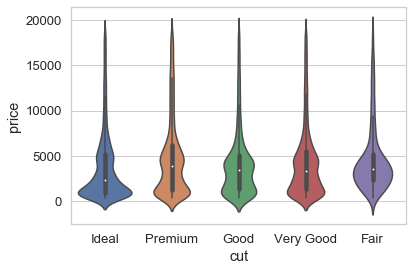

In [133]:
sns.violinplot(data = df_top, x = 'cut', y = 'price')

## 10.위에서 구한 `df_top` 변수에 담긴 데이터로 아래의 그래프가 그려지도록 해주세요.
<img src="https://i.imgur.com/QYJos2r.png">

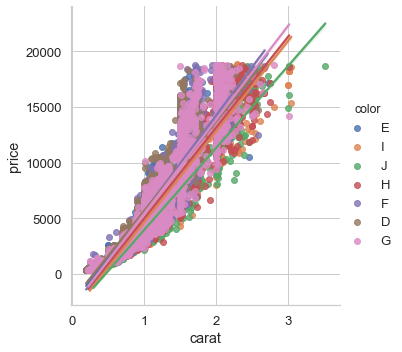

In [135]:
sns.lmplot(data = df_top, x = 'carat', y = 'price', hue = 'color')